## Programming for Data Analytics Project
### Contact Centre Metrics

In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from IPython.display import Image
import datetime as dt
from seaborn import countplot
from matplotlib.pyplot import figure, show

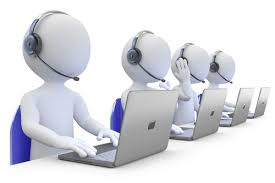

In [514]:
Image("Callpic.jpg") #load call centre image

### Contact Center
Contact centers offer omnichannel customer support for a nuber of different services including email, chat, voice over IP (VoIP) and website support. The purpose of this project is to demonstrate the benefits of simulated data analysis for the customer service sector. The Customer contact data can be simulated using Numpy random distributions which can then be used to predict contact center key performance indicators and measure how change can affect performance against service level agreements. A service level agreement SLA is a contract between the service provider and the end user, defining the expected level of service.  For this Project, the focus will be on the volume of monthly incoming voice calls to a small customer support center. A working hypothesis based on typical contact senter data is generated to simulate a working model of key metrics associated with monthly incoming voice communication. Modeling and predictive simulation can add value to the call center sector. In any competetive environment there is a level of change and the business that has the best understanding of this is best placed to have a competitative edge. From a progressive managament point of view, modeling and simulation can help convince team members the necessity of change to improve business processes and reduce time to complete tasks. It can be used to identify risks like underachievement of call center metrics and revenue liabilites due to service level agreements. 

### Incoming Calls
Incoming voice calls are one of the most significant workflows for contact center support staff. The volume of calls varies  from day to day and it is a challenge for management to meet resource and service level agreement demands. Simulated contact center communication data for this project is generated via the Numpy random distributions such as the Poisson distribution. The Poisson distribution, named after French mathematician S. D. Poisson, is a statistical distribution showing the likely number of times that an event will occur within a specified period of time.(1) Various research on the Poisson distribution show how suitable it is at simulating the arrivals at a facility within a set period of time. Two values are required for numpy.random.poisson, the mean value and the number of records reuired. A small sized Informtion Technology support center would expect to receive on average, 180 voice calls daily. I have used a monthly mean value of 3617 (five day week) to simulate monthly voice traffic for 120 periods (10 years).

#### Set Dates
Set future dates using Pandas function date_range, with a monthly frequency and 100 periods. 

In [515]:
rng = pd.date_range('1/1/2019', periods = 120, freq = 'M')

#### Load Dataframe
Pandas DataFrame is an in-memory representation of an excel sheet in the Python. Load dataframe Calls column with a poisson mean value of 3617 for 120 rows (10 years). Graphing the result highlights the expected peaks and troughs associated with contact center voice traffic. The date and call values can be changed to allow managamant to visualise different scenarios. For instance, if voice traffic increased by 50 calls per day, what effect would that have on quality and compliance with service level agreements. Changing the data would allow us to visualise the impact and apply a mitigation plan. 

Text(0,0.5,'Number I/C calls')

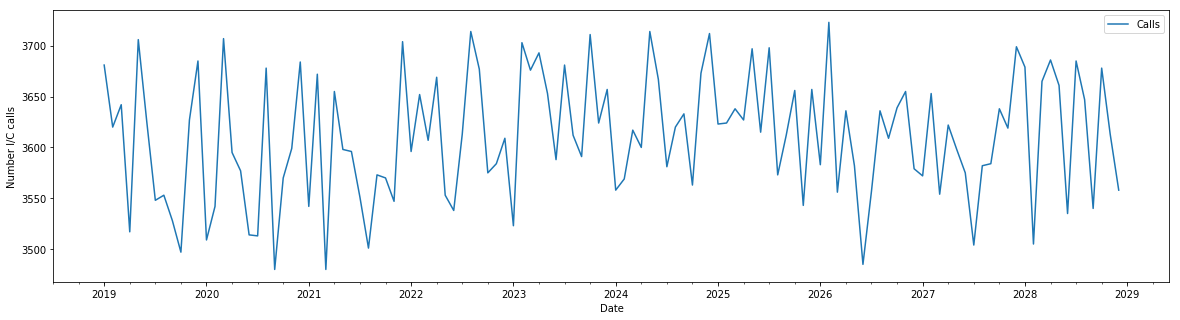

In [566]:
Calls = pd.DataFrame(np.random.poisson(3617, len(rng)), index=rng, columns = ["Calls"]) # set mean incoming call value = 3617
Calls.plot(y=['Calls'], use_index=True, figsize=(20, 5)) # show graph of simulated voice calls
plt.xlabel('Date')
plt.ylabel('Number I/C calls')

### Average Speed of Answer 
In order to ensure a customer's wait time is within an acceptable range, management need to keep track of average speed of answer. This metric is the total time callers wait for Answered calls divided by the total number of calls answered by agents. This includes the amount of time callers wait in a waiting queue and while the agent’s phone rings however does not include the time it takes for callers to navigate through the interactive voice response (IVR) system. It is a great indicator of whether or not your team is providing their callers with the service they expect.(2) From my research, I have found that this measure is closely related to customer satisfaction and is often included in the overall customer satisfaction rating. In everyday business, no customer likes to wait for a long time to buy groceries or to be served in a restaurant. Customers are unlikely to return if they leave without being served. This logic also applies to contact canter customers. Average waiting time must be kept to a minimum in order to help management achieve customer satisfaction targets. The global metric (3) is 28 seconds. 

Average Speed of Answer = Total Waiting Time for Answered Calls/Total Number of Answered Calls



#### Load Dataframe
Load dataframe with Numpy random.randint values of between 12 and 35, filling 120 rows (months). Plot a graph showing Service Level Agreement value of 20. 

Text(0,0.5,'Ratio')

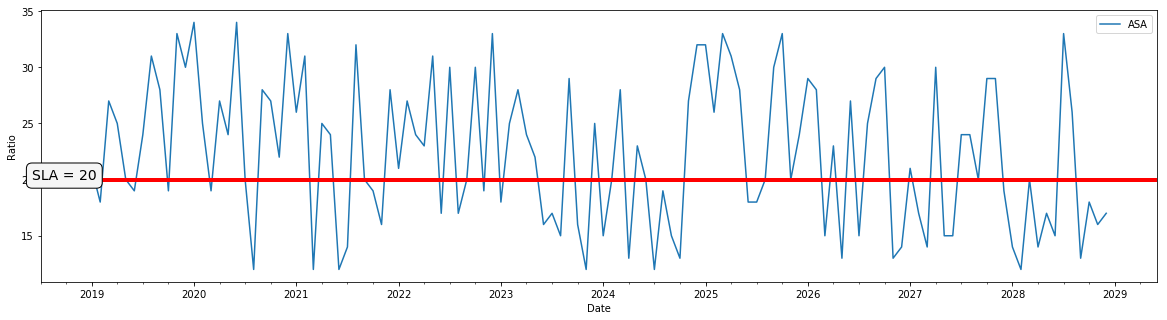

In [567]:
Calls["ASA"] = pd.DataFrame.assign(np.random.randint(12,35, len(rng))) # randomly generate time in Q - values between 12 - 35
Calls.plot(y=['ASA'], use_index=True, figsize=(20, 5)) # show graph of simulated time in Q

plt.axhline(y=20, linewidth=4, color='r') # highlight SLA value of 20
plt.text(x=dt.date(2018, 6,1), y=20, s="SLA = 20", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4")); # add label to SLA line
plt.xlabel('Date')
plt.ylabel('Ratio')

### Abandoned Calls
This is the number of callers that hang up before an agent answers. Calls can be abandoned for different reasons. I have centered the generation of the random poisson number around a mean of 250. This number will be used in calculation of the Abandonment rate. 

Text(0,0.5,'Number Abandoned')

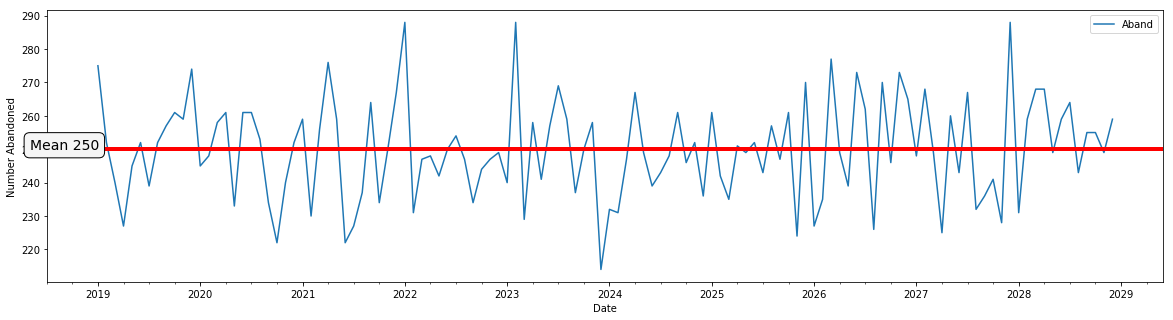

In [569]:
Calls["Aband"] = pd.DataFrame.assign(np.random.poisson(250, len(rng))) # mean value for Abandoned calls = 250
Calls.plot(y=['Aband'], use_index=True, figsize=(20, 5)) # show graph of simulated abandoned calls
plt.axhline(y=250, linewidth=4, color='r') # highlight mean value of 250
plt.text(x=dt.date(2018, 5,1), y=250, s="Mean 250", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4")); # add label to SLA line
plt.xlabel('Date')
plt.ylabel('Number Abandoned')

### Abandonment Rate
Call abandonment is the percentage of callers who hang up before reaching an agent. This is a common occurrence in a call center and has a detrimental impact on customer retention. (2) From research, I have learned that call center management need to keep a close eye on abandonment rate as an increase can adversely affect the caller satisfaction rate. The global metric (3) for Abandonment Rate in a contact center is between 5% – 8%. The metric is calculated by dividing the number of Abandoned Calls by the Total Incoming call number. 


Text(0,0.5,'Rate')

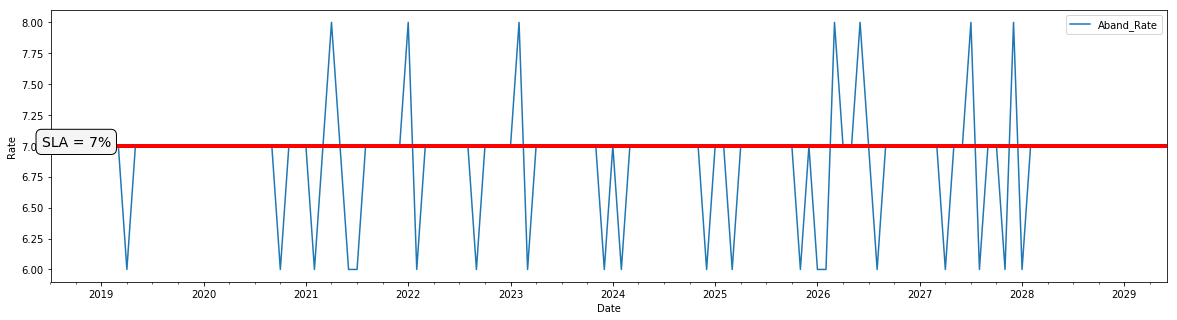

In [570]:
Calls["Aband_Rate"] = pd.DataFrame.assign((Calls.Aband / Calls.Calls)*100).apply(np.round) # calculate Abandonment rate
Calls.plot(y=['Aband_Rate'], use_index=True, figsize=(20, 5)) # show graph of simulated voice calls
plt.axhline(y=7, linewidth=4, color='r') # highlight SLA = 7%
plt.text(x=dt.date(2018, 6,1), y=7, s="SLA = 7%", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4")); # add label to SLA line
plt.xlabel('Date')
plt.ylabel('Rate')

#### Visualise Abandonment rate pass and fail values

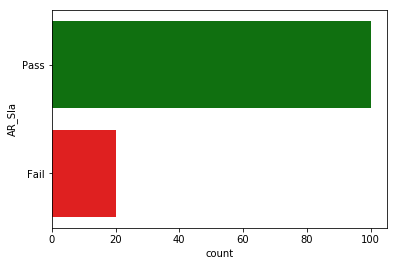

In [571]:
Calls.loc[Calls.Aband_Rate >= 7, 'AR_Sla'] = 'Pass' # create new column. Assign pass values of Aband_Rate equal to or over 7
Calls.loc[Calls.Aband_Rate < 7, 'AR_Sla'] = 'Fail'
colours = ["green", "red"]

figure()
countplot(data=Calls,y='AR_Sla', palette=colours) # plot graph of pass and fail
show()

### Service Level
Service level is the percentage of calls answered within a specified timeframe. The global metric (3) for Service Level in contact centers is 80% of calls answered within 20 seconds. I have simulated a service level range of values between 50% - 84% in this notebook by setting Numpy random.poisson mean value to 75. The service level agreement SLA of this metric is 70%.

Text(0,0.5,'Service Level')

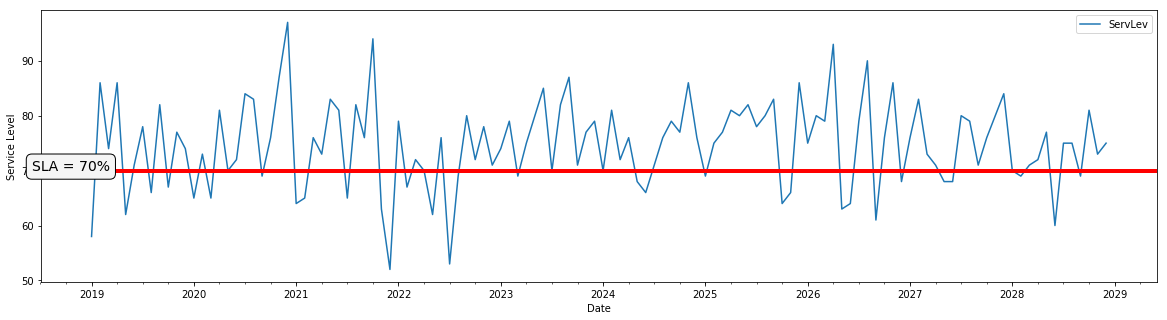

In [572]:
Calls["ServLev"] = pd.DataFrame.assign(np.random.poisson(75, len(rng))) # assign mean service level value = 75
Calls.plot(y=['ServLev'], use_index=True, figsize=(20, 5)) # show graph of service level
plt.axhline(y=70, linewidth=4, color='r') # highlight SLA = 70%
plt.text(x=dt.date(2018, 6,1), y=70, s="SLA = 70%", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4")); # add label to SLA line
plt.xlabel('Date')
plt.ylabel('Service Level')

#### Visualise Service Level Performance Vs Service Level Agreement 

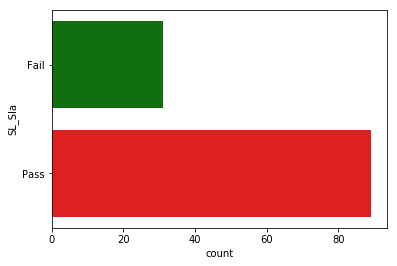

In [573]:
Calls.loc[Calls.ServLev >= 70, 'SL_Sla'] = 'Pass' # create new column. Assign pass values of ServLev equal to or over 70
Calls.loc[Calls.ServLev < 70, 'SL_Sla'] = 'Fail'
colours = ["green", "red"]
figure()
countplot(data=Calls,y='SL_Sla', palette=colours)   # plot graph of pass and fail
show()

### Net Promoter Score
Net Promoter Score, NPS is a measure of the customer's overall  opinion of the company and helps to determine customer loyalty. How likely is a customer to recommend the service to a friend? It is simple and easy to understand, using a scale of 0 - 10, with 10 being most likely to recommend. The great benefit of NPS is that it easily identifies unsatisfied customers who may be at risk of leaving. Based on the customer's response, customers are assigned a label. Detractors respond with a score of 0 - 6, Passives in the 7 - 8 range and Promoters in the 9 - 10 range. (4)

NPS score = Promoters% - Detractors%

The benchmark (5) NPS for Telecommunication companies is 32. 


Text(0,0.5,'NPS Survey Figure')

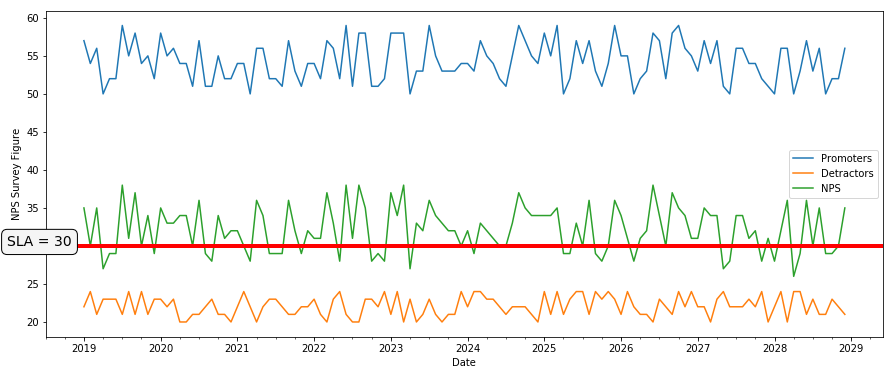

In [574]:
Calls['Promoters'] = np.random.randint(50,60, size=len(rng)) # random generation of NPS promoters
Calls['Detractors'] = np.random.randint(20,25, size=len(rng)) # random generation of NPS detractors
Calls["NPS"] =  Calls['Promoters'] - Calls['Detractors'] # NPS calculation = promoters - detractors
Calls.plot(y=['Promoters','Detractors', 'NPS'], use_index=True, figsize=(15,6)) # show on NPS figures on graph
plt.axhline(y=30, linewidth=4, color='r') # highlight SLA = 30%
plt.text(x=dt.date(2018, 1,1), y=30, s="SLA = 30", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4")); # add label to SLA line
plt.xlabel('Date')
plt.ylabel('NPS Survey Figure')

#### Visualise Net Promoter Score Vs Service Level Agreement

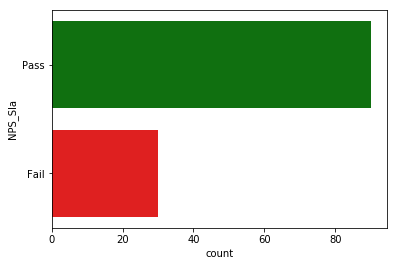

In [575]:
Calls.loc[Calls.NPS >= 30, 'NPS_Sla'] = 'Pass' # create new column. Assign pass values of ServLev equal to or over 30
Calls.loc[Calls.NPS < 30, 'NPS_Sla'] = 'Fail'
colours = ["green", "red"]
figure()
countplot(data=Calls,y='NPS_Sla', palette=colours)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
show()

### Demonstration of additional graphs and visualisation of interest

Generate customer satisfaction survey results and classify

In [577]:
Calls["Sfact"] =  pd.DataFrame.assign(np.random.poisson(70, len(rng))) # Caller satisfaction rate mean val = 70
Calls.loc[Calls.Sfact >= 80, 'Cust_Rating'] = 'Very Satisfied' 
Calls.loc[Calls.Sfact < 80, 'Cust_Rating'] ='Satisfied'
Calls.loc[Calls.Sfact < 75, 'Cust_Rating'] = 'Neutral' 
Calls.loc[Calls.Sfact < 70, 'Cust_Rating'] = 'Unsatisfied' 
Calls.loc[Calls.Sfact < 60, 'Cust_Rating'] = 'Vey Unsatisfied' 
Calls.head()

,Calls,ASA,Aband,Aband_Rate,AR_Sla,ServLev,SL_Sla,Promoters,Detractors,NPS,NPS_Sla,Sfact,Cust_Rating
2019-01-31,3681,21,275,7.0,Pass,58,Fail,57,22,35,Pass,69,Unsatisfied
2019-02-28,3620,18,252,7.0,Pass,86,Pass,54,24,30,Pass,74,Neutral
2019-03-31,3642,27,240,7.0,Pass,74,Pass,56,21,35,Pass,82,Very Satisfied
2019-04-30,3517,25,227,6.0,Fail,86,Pass,50,23,27,Fail,61,Unsatisfied
2019-05-31,3706,20,245,7.0,Pass,62,Fail,52,23,29,Fail,80,Very Satisfied


Graph results of customer survey

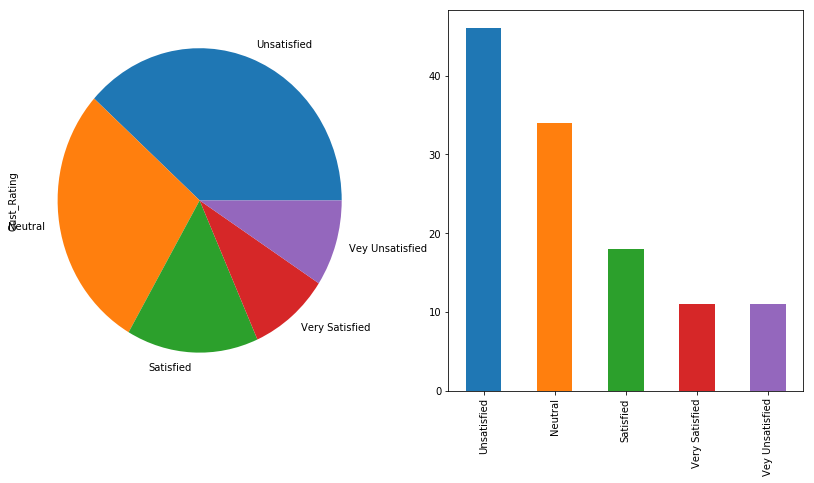

In [578]:
df4 = Calls['Cust_Rating'].value_counts()
plt.subplot(1,2,1)
df4.plot.pie(figsize=(14,7));

plt.subplot(1,2,2)
df4.plot.bar(figsize=(14,7));

Text(10,25,'SLA')

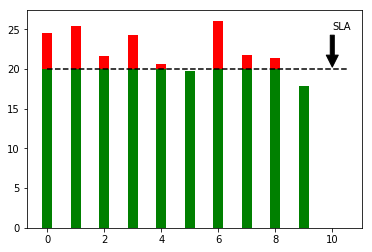

In [579]:
SLA = 20.0
values = Calls['ASA'].resample('Y').mean()
x = range(len(values))

above_sla = np.maximum(values - SLA, 0) # divide values above and below SLA
below_sla = np.minimum(values, SLA)

# plot data
fig, ax = plt.subplots()
ax.bar(x, below_sla, 0.35, color="g")
ax.bar(x, above_sla, 0.35, color="r", bottom=below_threshold)

# plot horizontal line indicating SLA
ax.plot([0., 10.5], [SLA, SLA], "k--")
ax.annotate('SLA', xy=(10, 20), xytext=(10, 25), arrowprops=dict(facecolor='black', shrink=0.05))

In [581]:
Calls.loc['2020-11-30':'2021-05-31']

,Calls,ASA,Aband,Aband_Rate,AR_Sla,ServLev,SL_Sla,Promoters,Detractors,NPS,NPS_Sla,Sfact,Cust_Rating
2020-11-30,3599,22,240,7.0,Pass,87,Pass,52,21,31,Pass,65,Unsatisfied
2020-12-31,3684,33,252,7.0,Pass,97,Pass,52,20,32,Pass,64,Unsatisfied
2021-01-31,3542,26,259,7.0,Pass,64,Fail,54,22,32,Pass,70,Neutral
2021-02-28,3672,31,230,6.0,Fail,65,Fail,54,24,30,Pass,65,Unsatisfied
2021-03-31,3480,12,256,7.0,Pass,76,Pass,50,22,28,Fail,77,Satisfied
2021-04-30,3655,25,276,8.0,Pass,73,Pass,56,20,36,Pass,66,Unsatisfied
2021-05-31,3598,24,259,7.0,Pass,83,Pass,56,22,34,Pass,80,Very Satisfied


In [582]:
Calls.loc['2020-11-30':'2021-05-31'].mean().astype(int)

Calls         3604
ASA             24
Aband          253
Aband_Rate       7
ServLev         77
Promoters       53
Detractors      21
NPS             31
Sfact           69
dtype: int32

In [583]:
Calls.resample('Y').mean().astype(int)

,Calls,ASA,Aband,Aband_Rate,ServLev,Promoters,Detractors,NPS,Sfact
2019-12-31,3602,24,252,6,73,54,22,32,70
2020-12-31,3580,25,247,6,76,53,21,32,72
2021-12-31,3582,21,248,6,72,53,22,31,72
2022-12-31,3615,24,248,6,70,54,22,32,72
2023-12-31,3642,20,250,6,77,54,21,33,64
2024-12-31,3625,19,245,6,74,54,22,32,69
2025-12-31,3630,26,249,6,76,54,23,31,68
2026-12-31,3603,21,253,6,76,55,22,32,66
2027-12-31,3600,21,248,6,75,53,22,31,72
2028-12-31,3621,17,254,6,72,53,22,31,69


In [584]:
Calls.head()

,Calls,ASA,Aband,Aband_Rate,AR_Sla,ServLev,SL_Sla,Promoters,Detractors,NPS,NPS_Sla,Sfact,Cust_Rating
2019-01-31,3681,21,275,7.0,Pass,58,Fail,57,22,35,Pass,69,Unsatisfied
2019-02-28,3620,18,252,7.0,Pass,86,Pass,54,24,30,Pass,74,Neutral
2019-03-31,3642,27,240,7.0,Pass,74,Pass,56,21,35,Pass,82,Very Satisfied
2019-04-30,3517,25,227,6.0,Fail,86,Pass,50,23,27,Fail,61,Unsatisfied
2019-05-31,3706,20,245,7.0,Pass,62,Fail,52,23,29,Fail,80,Very Satisfied


In [586]:
Temp = Calls.loc[Calls['ASA'] <= 22]
Temp.head()

,Calls,ASA,Aband,Aband_Rate,AR_Sla,ServLev,SL_Sla,Promoters,Detractors,NPS,NPS_Sla,Sfact,Cust_Rating
2019-01-31,3681,21,275,7.0,Pass,58,Fail,57,22,35,Pass,69,Unsatisfied
2019-02-28,3620,18,252,7.0,Pass,86,Pass,54,24,30,Pass,74,Neutral
2019-05-31,3706,20,245,7.0,Pass,62,Fail,52,23,29,Fail,80,Very Satisfied
2019-06-30,3625,19,252,7.0,Pass,71,Pass,52,23,29,Fail,71,Neutral
2019-10-31,3497,19,261,7.0,Pass,67,Fail,54,24,30,Pass,67,Unsatisfied


In [587]:
Calls.head()

,Calls,ASA,Aband,Aband_Rate,AR_Sla,ServLev,SL_Sla,Promoters,Detractors,NPS,NPS_Sla,Sfact,Cust_Rating
2019-01-31,3681,21,275,7.0,Pass,58,Fail,57,22,35,Pass,69,Unsatisfied
2019-02-28,3620,18,252,7.0,Pass,86,Pass,54,24,30,Pass,74,Neutral
2019-03-31,3642,27,240,7.0,Pass,74,Pass,56,21,35,Pass,82,Very Satisfied
2019-04-30,3517,25,227,6.0,Fail,86,Pass,50,23,27,Fail,61,Unsatisfied
2019-05-31,3706,20,245,7.0,Pass,62,Fail,52,23,29,Fail,80,Very Satisfied


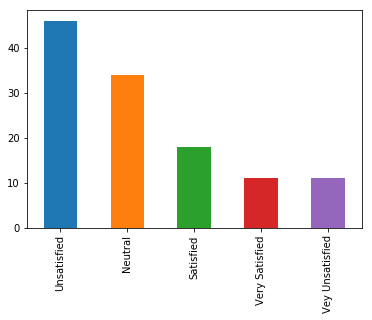

In [588]:
df4.plot.bar();

In [589]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.show()

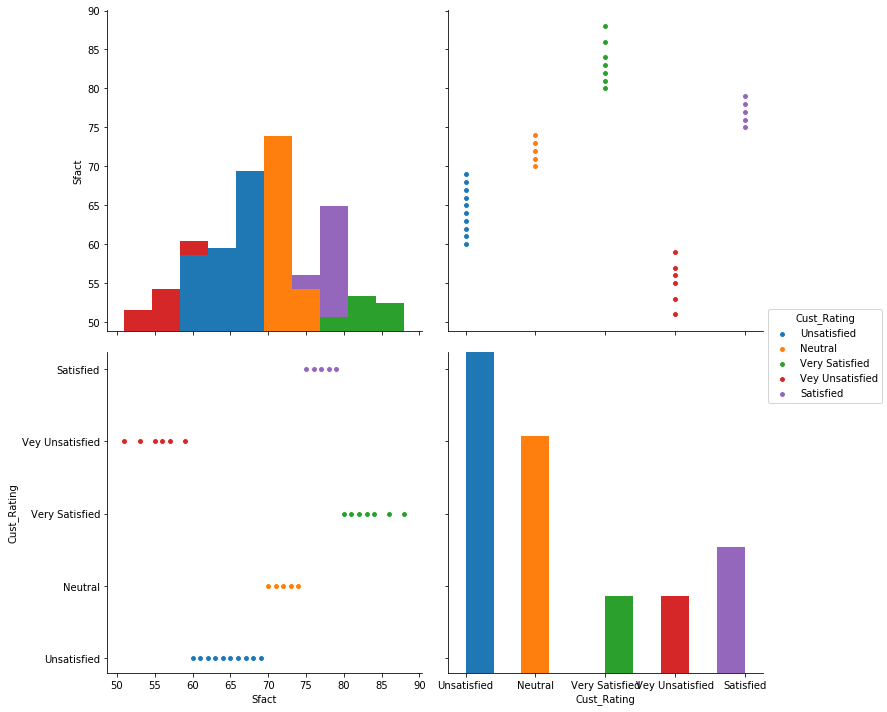

In [591]:
import seaborn as sns
sns.pairplot(Calls, hue='Cust_Rating', vars=['Sfact', 'Cust_Rating'], size = 5)

1. Poisson distribution https://www.investopedia.com/terms/p/poisson-distribution.asp

2. Call Center KPI's  https://www.talkdesk.com/blog/12-call-center-kpis-to-track-for-success/ 

3. Call Center - Global best practices https://www.ifc.org/wps/wcm/connect/75ce96004cf85d4f8752c7f81ee631cc/Tool+9.4.+Measuring+Call+Center+Performance.pdf?MOD=AJPERES

4. Vodafone Net Promoter Score https://npsbenchmarks.com/companies/vodafone-uk


In [ ]:
5. NPS Benchmarking  https://npsbenchmarks.com/companies